In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("Untitled_cereal.csv")

# Understanding the data

In [57]:
df.shape

(77, 16)

In [58]:
df.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


In [59]:
df.duplicated().sum()

0

In [60]:
df.dropna(inplace=True)

In [62]:
df.drop("name",inplace=True,axis=1)

In [63]:
 df["mfr"].value_counts()

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

In [64]:
df["type"].value_counts()

type
C    74
H     3
Name: count, dtype: int64

# EDA Data Analysis

In [65]:
df.head(2)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


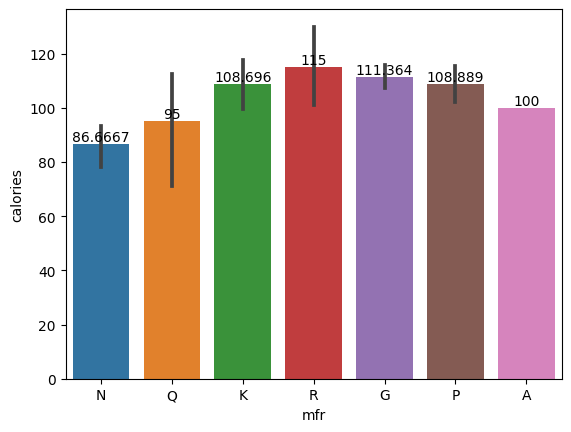

In [66]:
a = sns.barplot(x="mfr",y="calories",data=df)
for bars in a.containers:
    a.bar_label(bars)
plt.show()

## Summary of the data

## Highest amount:
<p>Calories range : 100-120(count46)</p>
<p>Proteins : 2,3</p>
<p>Fat : 0,1</p>
<p>Carbo : 10-15</p>
<p>Sugar : 4</p>
<p>Potass : 0-150</p>
<p>Vitamins : 25-35</p>
<p>Shelf : 2.75-3.00</p>
<p>Weight : 1.00</p>
<p>Rating : 33-42</p>

## Highes amount in mfr and type
<p>Highest rating awarded to N-mfr .... H-type</p>
<p>Higest protein has A-mfr .... H-type</p>
<p>Higest fat has Q-mfr ..... C-type and H-type have same fat</p>
<p>Higest vitamins has K-mfr and G-mfr ..... C-type</p>
<p>Higest sugars has P-mfr .... C-type</p>
<p>All mfr .... and type have same calories</p>
<p></p>
<p></p>

# Splitting data

In [67]:
df.head(2)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


In [95]:
o = ["fiber","carbo","weight","cups","rating"]
for item in o:
    df[item] = df[item].astype("int32")

In [97]:
df.head(2)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10,5,6,280,25,3,1,0,68
1,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33


In [98]:
from sklearn.model_selection import train_test_split

x = df.drop("rating",axis=1)
y = df["rating"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=101)

## Categorical encoding

In [125]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("trans1",OneHotEncoder(drop="first"),["mfr"]),
        ("trans2",OneHotEncoder(drop="first"),["type"])
    ],
    remainder="passthrough")

In [126]:
transformer.fit(x_train)
x_train_new = transformer.transform(x_train)
x_test_new = transformer.transform(x_test)

In [129]:
x_train_new.shape

(61, 19)

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_new = scaler.fit_transform(x_train_new)
x_test_new = scaler.transform(x_test_new)

In [131]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_new,y_train)

out = model.predict(x_test_new)

In [132]:
from sklearn.metrics import mean_squared_error

print("Mean square error")
print("--"*40)
mse = mean_squared_error(y_test,out)
rmse = np.sqrt(mse)
print("Mean error : ",mse)
print("Root : ",rmse)

Mean square error
--------------------------------------------------------------------------------
Mean error :  0.39741594066732333
Root :  0.6304093437341513


In [133]:
result = np.column_stack((y_test,out))
print("Actual values | Predicted values")
print("--"*40)
for actual,predicted in result:
    print(f"{actual:7.1f} | {predicted:7.1f}")



Actual values | Predicted values
--------------------------------------------------------------------------------
   52.0 |    51.2
   58.0 |    58.3
   50.0 |    51.6
   36.0 |    36.7
   59.0 |    59.4
   45.0 |    44.7
   26.0 |    27.0
   41.0 |    41.2
   40.0 |    40.8
   31.0 |    31.4
   40.0 |    40.3
   36.0 |    35.9
   46.0 |    45.9
   22.0 |    22.8
   51.0 |    51.1
   33.0 |    33.0


In [134]:
# see results by differentiation
residual = actual-out.reshape(-1)
print(residual)

[-18.23789611 -25.29227207 -18.56109133  -3.74811475 -26.44763187
 -11.72591498   6.04439061  -8.18915636  -7.75414064   1.60970272
  -7.27636771  -2.85812396 -12.85035693  10.21245625 -18.09938368
   0.03490397]
